In [1]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt

from keras.models import load_model, model_from_json

In [3]:
MODEL = 'all'
IMAGE_SHAPE = (299, 299)
BATCH_SIZE = 8
NB_CLASSES = 3

In [4]:
save_name = 'model_' + MODEL +'.json'
json_file = open(save_name, 'r')
loaded_model_json = json_file.read()
json_file.close()

In [5]:
model = model_from_json(loaded_model_json)
save_name = 'model_weights_' + MODEL +'.h5'
model.load_weights(save_name)

In [6]:
test_img_list = []

test_img_name_list = glob.glob('files/*')

for i in range(len(test_img_name_list)):

    src_img = cv2.imread(test_img_name_list[i], cv2.IMREAD_COLOR)
    src_img = cv2.resize(src_img, dsize=IMAGE_SHAPE)

    dst_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)

    dst_img = dst_img / 255.0

    test_img_list.append(dst_img)

print(test_img_name_list)
print(len(test_img_list))

['files/6570_A2LEBJJDE001675_1607770880722_3_TH.jpg', 'files/8896_A2LEBJJDE001807_1606456624675_5_RH.jpg', 'files/9244_A2LEBJJDE00154W_1607590572671_6_BH.jpg', 'files/9338_A2LEBJJDE00101D_1606539915853_3_TH.jpg', 'files/9338_A2LEBJJDE00101D_1606561449285_2_TH.jpg', 'files/9527_A2LEBJJDE00110E_1606733122767_6_BH.jpg', 'files/9578_A2LEBJJDE00105K_1608350762473_5_RH.jpg', 'files/9874_A2LEBJJDE00123M_1606720536536_5_RH.jpg']
8


In [8]:
pred = model.predict(np.array(test_img_list))

In [9]:
class_name = ['normal','mild','severe']  # ImageDataGenerator 에서

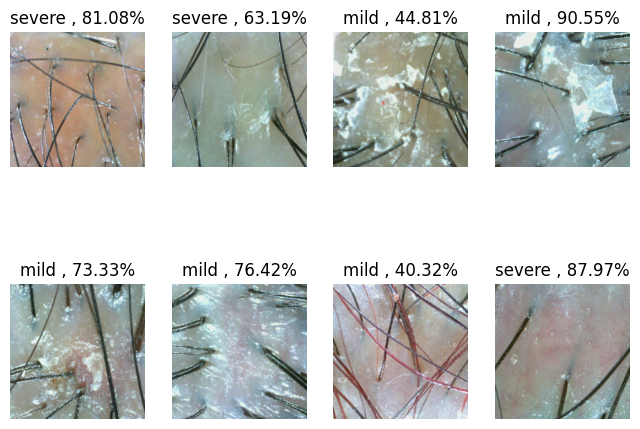

In [13]:
plt.figure(figsize=(8,6))

for i in range(len(pred)):

    plt.subplot(2, 4, i+1)
    prediction = str(class_name[np.argmax(pred[i])])
    probility = '{0:0.2f}'.format(100*max(pred[i]))
    title_str = prediction + ' , ' + probility + '%'
    plt.axis('off')
    plt.title(title_str)
    plt.imshow(test_img_list[i])

plt.show()

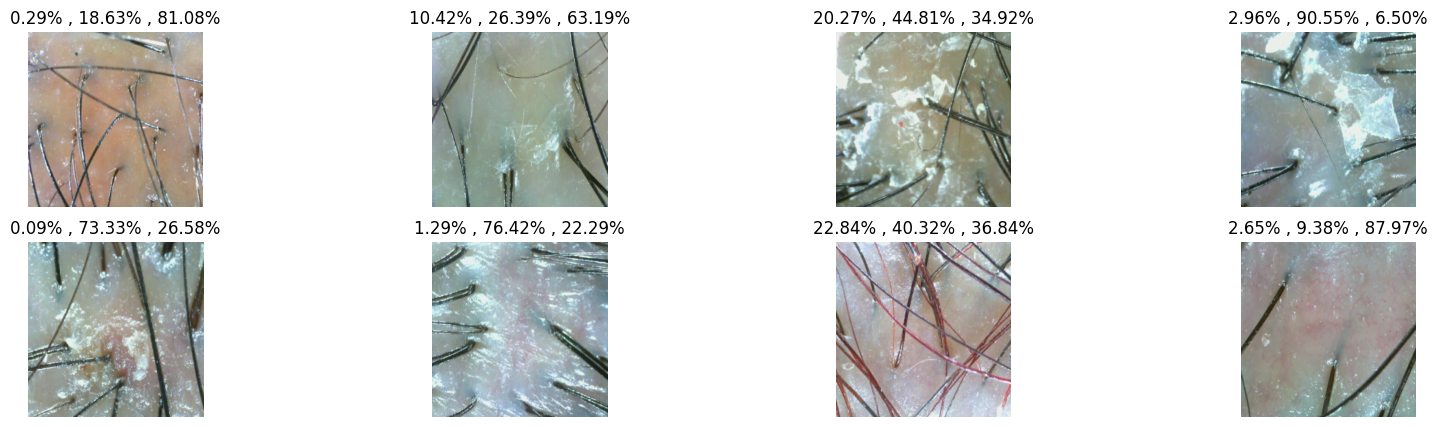

In [26]:
plt.figure(figsize=(20,5))

for i in range(len(pred)):
    plt.subplot(2, 4, i+1)
    normal = '{0:0.2f}'.format(100 * pred[i][0])
    mild = '{0:0.2f}'.format(100 * pred[i][1])
    severe = '{0:0.2f}'.format(100 * pred[i][2])
    
    title_str = normal + '% , ' +  mild + '% , ' + severe + '%'
    plt.axis('off')
    plt.title(title_str)
    plt.imshow(test_img_list[i])

plt.show()